In [151]:
class Paciente:
    nombre = ''
    edad = 0
    tipo='a'
    genero=''
    estado = False

    def __init__(self, nombre, edad, tipo, genero, estado):
        self.nombre = nombre
        self.edad = edad
        self.tipo = tipo
        self.genero=genero
        self.estado = estado
        



In [152]:
import pandas as pd
import numpy as np
url = 'C:\\Users\\Braulio Castro\\Desktop\\10 Ciclo\\Simulacion\\Casos covid por provincias.xlsx'
df = pd.read_excel(url)
formatofecha='%Y-%m-%d'
casos=[]
#Leemos los datos de la proviencia de Cotopaxi
#se ecuentra en la posicion 5
datos=df.iloc[5]
for i in datos:
    casos.append(i)
casos.pop(0)
#guardamos los datos en una lista
y=np.array(casos)
media = round(y.mean()*3)
media

65.0

In [255]:
import simpy
import random
import matplotlib.pyplot as plt

%matplotlib inline

# maximo de pacientes por dia 
MAX_PACIENTES = 200
#total recursos
TEST = 50
# Tiempo que tarda en atenderse un paciente (minutos)
TIEMPO_ATENCION = 17
# Intervalo de tiempo en que llegan pacientes(minutos)
INTERVALO_LLEGADA = media
# Tiempo de simulación
TIEMPO_SIMULACION = 1000
#Numero de respiradores
RESPIRADORES = 100
#Numero de camas
NUM_CAMAS_HOSPITALIZACION=114
NUM_CAMAS_INTENSIVO=18

PRECIO_TEST = [100, 200]
ncamas = 114
ncamas2 = 18
nrespiradores = 100
listaSintomas=[]
listaNeumonia=[]
listaIntensivo=[]
listaFallecidos=[]
listaCurados=[]
class Hospital(object):
    
    def __init__(self, environment, num_test, tiempo_atencion, camas, num_respiradores,camas2):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa los consultorios
        self.test = simpy.Resource(environment, num_test)
        self.camas = simpy.Resource(environment, camas)
        # Variable para el tiempo de atencion 
        self.tiempo_atencion = tiempo_atencion
        self.respirador = simpy.Resource(environment, num_respiradores)
        self.camas2 = simpy.Resource(environment, camas2)
    def atencion(self, paciente):
        yield self.env.timeout(random.randint(TIEMPO_ATENCION-2, TIEMPO_ATENCION+2))   
        print(chr(27)+"[0;30m Paciente "+paciente.nombre,' Atendido')
        precio = 0
        pr = random.randint(1, 10)
        if pr > 5:
            precio = PRECIO_TEST[0]
        else:
            precio = PRECIO_TEST[1]
        print('El costo de la Prueba es de:', precio)
        costos_totales.append(precio)
        cont.append(1)
        
    def zona_aislamiento3(self, paciente, hospital):
        print(chr(27)+"[0;30m"+'El Paciente: %s llega a la hora %.2f.' % (paciente.nombre, (self.env.now+420)/60),'A la Zona de aislamiento 3')
        
        t=random.randint(22, 24)
        rnd = random.randint(1,100)
        if paciente.tipo=='n' or paciente.tipo=='a' or paciente.tipo=='m':
            if rnd <= 50:
                #50% de probabilidad de fallecer
                #50% de probabilidad de recuperado
                yield self.env.timeout(t)
                print(chr(27)+"[1;31m"+'El Paciente',paciente.nombre, 'Fallece a ', t ,' Dias de Hospitalizacion')
                listaFallecidos.append(paciente)
            else:
                yield self.env.timeout(t)
                print(chr(27)+"[1;32m"+'El Paciente', paciente.nombre, 'Se cura a', t ,' Dias de Hospitalizacion')
                listaCurados.append(paciente)
        
            
                   
    def zona_aislamiento2(self, paciente, hospital):
        print(chr(27)+"[0;30m"+'El Paciente: %s llega a la hora %.2f.' % (paciente.nombre, (self.env.now+420)/60),'A la Zona de aislamiento 2')
        t3=random.randint(7, 21)
        rnd = random.randint(1,100)
        global ncamas2
        if paciente.tipo=='n' or paciente.tipo=='a' or paciente.tipo=='m':
            if rnd <= 25:
                #25% de probabilidad de cuidados intensivos
                #75% de probabilidad de recuperado
                yield self.env.timeout(t3)
                print(chr(27)+"[0;36m"+'El Paciente',paciente.nombre, 'Pasa a Cuidados Intensivos a ', t3 ,' Dias de Hospitalizacion')
                with hospital.camas2.request() as cama2:
                    yield cama2
                    # Indicamos que paciente entra al consultorio
                    print(chr(27)+"[1;34m"+'Se le asigna a una cama de iNTENSIVOS al Paciente: %s a la hora %.2f.' % (paciente.nombre, (env.now+420)/60))

                    ncamas2-= 1
                    print(chr(27)+"[1;34m"+'CAMAS DISPONIBLES DE INTENSIVOS', ncamas2)
                    yield self.env.process(hospital.zona_aislamiento3(paciente, hospital))
                    listaIntensivo.append(paciente)
            elif rnd<= 75:
                yield self.env.timeout(t3)
                print(chr(27)+"[1;30m"+'El Paciente', paciente.nombre, 'Se cura a', t3 ,' Dias de Hospitalizacion')
                listaCurados.append(paciente)
                

        
    def zona_aislamiento(self, paciente, hospital):
        print(chr(27)+"[0;30m"+'El Paciente: %s llega a la hora %.2f.' % (paciente.nombre, (self.env.now+420)/60),'A la Zona de aislamiento 1')
        t2=random.randint(2, 14)
        t3=random.randint(7, 21)
        global nrespiradores
        rnd = random.randint(1,100)
        if paciente.tipo=='n' or paciente.tipo=='a':
            #75% de probabilidad de neumonia
            #25% de probabilidad de recuperado
            
            if rnd <= 75:
                yield self.env.timeout(t2)
                print(chr(27)+"[0;33m"+'El Paciente',paciente.nombre, 'Tiene Neumonia, a ', t2 ,' Dias de Hospitalizacion')
                
                nrespiradores -= 1
                with hospital.respirador.request() as resp:
                    yield resp
                    print(chr(27)+"[0;35m"+'Se le asigna a un respirador al Paciente: %s a la hora %.2f.' % (paciente.nombre, (env.now+420)/60), "a los",t2,"Dias")
                    print(chr(27)+"[0;35m"+'RESPIRADORES DISPONIBLES', nrespiradores)
                    yield self.env.process(hospital.zona_aislamiento2(paciente, hospital))
                    listaNeumonia.append(paciente)
            elif rnd <= 25:
                yield self.env.timeout(t2)
                print(chr(27)+"[1;30m"+'El Paciente', paciente.nombre, 'Se cura a', t2 ,' Dias de Hospitalizacion')
                listaCurados.append(paciente)
        
        elif paciente.tipo=='m':
            #95% de probabilidad de neumonia
            #5% de probabilidad de recuperado
            print(chr(27)+"[0;30m"+'El Paciente: %s llega a la hora %.2f.' % (paciente.nombre, (self.env.now+420)/60),'A la Zona de aislamiento 1')
            if rnd <= 95:
                yield self.env.timeout(t2)
                print(chr(27)+"[0;33m"+'El Paciente',paciente.nombre, 'Tiene Neumonia, a ', t2 ,' Dias de Hospitalizacion')
                
                nrespiradores -= 1
                with hospital.respirador.request() as resp:
                    yield resp
                    print(chr(27)+"[0;35m"+'Se le asigna a un respirador al Paciente: %s a la hora %.2f.' % (paciente.nombre, (env.now+420)/60), "a los",t2,"Dias")
                    print(chr(27)+"[0;35m"+'RESPIRADORES DISPONIBLES', nrespiradores)
                    yield self.env.process(hospital.zona_aislamiento2(paciente, hospital))
                    listaNeumonia.append(paciente)
            else:
                yield self.env.timeout(t2)
                print(chr(27)+"[1;30m"+'El Paciente', paciente.nombre, 'Se cura a', t2 ,' Dias de Hospitalizacion')
                listaCurados.append(paciente)
        
    
def llegada_paciente(env, paciente, hospital):
    t1=random.randint(1, 7)
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el paciente con el nombre pasado como parametro
    print(chr(27)+"[0;30m"+'Llega Paciente: %s a la hora %.2f.' % (paciente.nombre, (env.now+420)/60))

    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # el consultorio del Hospital
    with hospital.test.request() as test:
        # Ocupamos los recursos
        yield test
        # Indicamos que el paciente entra al consultorio
        print(chr(27)+"[0;30m"+'Entra paciente: %s a atenderce a la hora %.2f.' % (paciente.nombre, (env.now+420)/60))
        
        # se realiza el test de covid_19
        global ncamas
        rnd = random.randint(1,100)
        if paciente.tipo=='n':
            if rnd<=5:
                yield env.process(hospital.atencion(paciente))
                print(chr(27)+"[0;31m"+'El Paciente [%s] Tiene Sintomas Leves  Atendido a las %.2f.' % (paciente.nombre, (env.now+420)/60),"Internado")
                with hospital.camas.request() as cama:
                    yield cama
                    # Indicamos que paciente entra al consultorio
                    print(chr(27)+"[0;34m"+'Se le asigna a una cama de Hospitalizacion al Paciente: %s a la hora %.2f.' % (paciente.nombre, (env.now+420)/60))
                    
                    ncamas-= 1
                    print(chr(27)+"[0;34m"+'CAMAS DISPONIBLES HOSPITALIZACION', ncamas)
                    cam_usadas.append(ncamas)
                    yield env.process(hospital.zona_aislamiento(paciente, hospital))
                    listaSintomas.append(paciente)
            else:
                yield env.process(hospital.atencion(paciente))
                print(chr(27)+"[0;32m"+' Asintomatico Paciente [%s] Recuperado a las %.2f.' % (paciente.nombre, (env.now+420)/60),'hrs En ',t1,"Dias")  
                listaCurados.append(paciente)
                 
        elif paciente.tipo=='a' or paciente.tipo=='m':
            if rnd<=100:
                yield env.process(hospital.atencion(paciente))
                print(chr(27)+"[0;31m"+'El Paciente [%s] Tiene Sintomas Leves  Atendido a las %.2f.' % (paciente.nombre, (env.now+420)/60),"Internado")

                with hospital.camas.request() as cama:
                    yield cama
                    # Indicamos que paciente entra al consultorio
                    print(chr(27)+"[0;34m"+'se le asigna a una cama de Hospitalizacion al Paciente: %s a la hora %.2f.' % (paciente.nombre, (env.now+420)/60))
                    
                    ncamas-= 1
                    print(chr(27)+"[0;34m"+'CAMAS DISPONIBLES HOSPITALIZACION', ncamas)
                    cam_usadas.append(ncamas)
                    yield env.process(hospital.zona_aislamiento(paciente, hospital))
                    listaSintomas.append(paciente)
                     
                 
                      
def ejecutar_simulacion(env, num_test, tiempo_atencion, intervalo, camas, num_respiradores, camas2):
    hospital=Hospital(env, num_test, tiempo_atencion, camas, num_respiradores, camas2)
    # Creamos 5 llegadas de pacientes iniciales
    
    for i in range(1,100):
        edad1 = random.randint(0, 14)
        edad2 = random.randint(15, 64)
        edad3 = random.randint(65, 80)
        rnd = random.randint(1,100)
        rnd2 = random.randint(1,100)
        if rnd <=28:
            if rnd2 <=13:
                paciente = Paciente('Niño-%d'%(i+1),edad1,'n','f',  False)
                env.process(llegada_paciente(env, paciente,hospital))
                paciente = None
                
            elif rnd2<=15:
                paciente = Paciente('Niño-%d'%(i+2),edad1,'n','m',  False)
                env.process(llegada_paciente(env, paciente,hospital))
                paciente = None
         
        elif rnd<=65:
            if rnd2 <=35:
                paciente = Paciente('Adulto-%d'%(i+1),edad2,'a','m',  False)
                env.process(llegada_paciente(env, paciente,hospital))
                paciente = None
            elif rnd2<=30:
                paciente = Paciente('Adulto-%d'%(i+2),edad2,'a','f',  False)
                env.process(llegada_paciente(env, paciente,hospital))
                paciente = None
        
        else:
            if rnd2 <=3:
                paciente = Paciente('Mayor-%d'%(i+1),edad3,'m','f',  False)
                env.process(llegada_paciente(env, paciente,hospital))
                paciente = None
            elif rnd2<=4:
                paciente = Paciente('Mayor-%d'%(i+2),edad3,'m','m',  False)
                env.process(llegada_paciente(env, paciente,hospital))
                paciente = None

        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+5))
        i+=1
        # Mientras se atienden los pacientes generamos mas pacientes
        edad1 = random.randint(0, 14)
        edad2 = random.randint(15, 64)
        edad3 = random.randint(65, 80)
        rnd = random.randint(1,100)
        rnd2 = random.randint(1,100)
        if rnd <=28:
            if rnd2 <=15:
                paciente = Paciente('Niño-%d'%(i+1),edad1,'n','m',  False)
            elif rnd2<=13:
                paciente = Paciente('Niño-%d'%(i+2),edad1,'n','f',  False)
         
        elif rnd<=65:
            if rnd2 <=35:
                paciente = Paciente('Adulto-%d'%(i+1),edad2,'a','m',  False)
            elif rnd2<=30:
                paciente = Paciente('Adulto-%d'%(i+2),edad2,'a','f',  False)
        
        else:
            if rnd2 <=4:
                paciente = Paciente('Mayor-%d'%(i+1),edad3,'m','m',  False)
            elif rnd2<=3:
                paciente = Paciente('Mayor-%d'%(i+2),edad3,'m','f',  False)
                

print('Hospital')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, TEST, TIEMPO_ATENCION, INTERVALO_LLEGADA, NUM_CAMAS_HOSPITALIZACION, RESPIRADORES, NUM_CAMAS_INTENSIVO))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)



Hospital
Llega Paciente: Adulto-3 a la hora 7.00.
Llega Paciente: Niño-9 a la hora 7.00.
Llega Paciente: Mayor-15 a la hora 7.00.
Llega Paciente: Mayor-15 a la hora 7.00.
Llega Paciente: Adulto-25 a la hora 7.00.
Llega Paciente: Niño-31 a la hora 7.00.
Llega Paciente: Adulto-58 a la hora 7.00.
Llega Paciente: Adulto-60 a la hora 7.00.
Llega Paciente: Adulto-69 a la hora 7.00.
Llega Paciente: Niño-71 a la hora 7.00.
Llega Paciente: Adulto-77 a la hora 7.00.
Llega Paciente: Niño-78 a la hora 7.00.
Llega Paciente: Adulto-79 a la hora 7.00.
Llega Paciente: Adulto-81 a la hora 7.00.
Llega Paciente: Adulto-83 a la hora 7.00.
Llega Paciente: Adulto-86 a la hora 7.00.
Llega Paciente: Niño-87 a la hora 7.00.
Llega Paciente: Adulto-89 a la hora 7.00.
Llega Paciente: Adulto-90 a la hora 7.00.
Llega Paciente: Adulto-91 a la hora 7.00.
Llega Paciente: Adulto-93 a la hora 7.00.
Llega Paciente: Adulto-94 a la hora 7.00.
Llega Paciente: Adulto-97 a la hora 7.00.
Entra paciente: Adulto-3 a atenderce a 

In [256]:
ninoSintoma=[]
adultoSintoma=[]
mayorSintoma=[]
print("\n")
print("Total Pacientes con sintomas: ",len(listaSintomas))
print("Detalle")
print("Nombre,  ","  Edad, ","Genero") 
for paciente in listaSintomas:
    print(paciente.nombre,", ",paciente.edad,", ",paciente.genero)
    if paciente.tipo=='n':
        ninoSintoma.append(paciente)
        
    elif paciente.tipo=='a':
        adultoSintoma.append(paciente)
    else:
        mayorSintoma.append(paciente)
print("---------------------")        
print("Total Ninos: ",len(ninoSintoma))
print("Total Adultos: ",len(adultoSintoma))
print("Total Mayor: ",len(mayorSintoma))
 
ninoN=[]
adultoN=[]
mayorN=[]
print("\n")
print("Total Pacientes con Neumonia: ",len(listaNeumonia))
print("Detalle") 
print("Nombre,  ","  Edad, ","Genero") 
for paciente in listaNeumonia:
    print(paciente.nombre,", ",paciente.edad,", ",paciente.genero)
    if paciente.tipo=='n':
        ninoN.append(paciente)
        
    elif paciente.tipo=='a':
        adultoN.append(paciente)
    else:
        mayorN.append(paciente)
print("---------------------")        
print("Total Ninos: ",len(ninoN))
print("Total Adultos: ",len(adultoN))
print("Total Mayor: ",len(mayorN))

ninoI=[]
adultoI=[]
mayorI=[]
print("\n")
print("Total Pacientes en Cuidados Intensivos: ",len(listaIntensivo))
print("Detalle") 
print("Nombre,  ","  Edad, ","Genero") 
for paciente in listaIntensivo:
    print(paciente.nombre,", ",paciente.edad,", ",paciente.genero)
    if paciente.tipo=='n':
        ninoI.append(paciente)
        
    elif paciente.tipo=='a':
        adultoI.append(paciente)
    else:
        mayorI.append(paciente)
print("---------------------")        
print("Total Ninos: ",len(ninoI))
print("Total Adultos: ",len(adultoI))
print("Total Mayor: ",len(mayorI))
ninoF=[]
adultoF=[]
mayorF=[] 
    
print("\n")
print("Total Pacientes Fallecidos: ",len(listaFallecidos))
print("Detalle") 
print("Nombre,  ","  Edad, ","Genero") 
for paciente in listaFallecidos:
    print(paciente.nombre,", ",paciente.edad,", ",paciente.genero)
    if paciente.tipo=='n':
        ninoF.append(paciente)
        
    elif paciente.tipo=='a':
        adultoF.append(paciente)
    else:
        mayorF.append(paciente)
print("---------------------")        
print("Total Ninos: ",len(ninoF))
print("Total Adultos: ",len(adultoF))
print("Total Mayor: ",len(mayorF))
ninoR=[]
adultoR=[]
mayorR=[] 

print("\n")
print("Total Pacientes Recuperados: ",len(listaCurados))
print("Detalle")  
print("Nombre,  ","  Edad, ","Genero") 
for paciente in listaCurados:
    print(paciente.nombre,", ",paciente.edad,", ",paciente.genero)
    if paciente.tipo=='n':
        ninoR.append(paciente)
        
    elif paciente.tipo=='a':
        adultoR.append(paciente)
    else:
        mayorR.append(paciente)
print("---------------------")        
print("Total Ninos: ",len(ninoR))
print("Total Adultos: ",len(adultoR))
print("Total Mayor: ",len(mayorR))



Total Pacientes con sintomas:  18
Detalle
Nombre,     Edad,  Genero
Adulto-3 ,  55 ,  m
Adulto-79 ,  48 ,  m
Adulto-93 ,  29 ,  m
Adulto-69 ,  28 ,  m
Adulto-91 ,  16 ,  m
Adulto-90 ,  39 ,  m
Adulto-58 ,  15 ,  m
Mayor-15 ,  67 ,  m
Adulto-89 ,  23 ,  m
Adulto-86 ,  62 ,  m
Adulto-25 ,  64 ,  m
Adulto-97 ,  17 ,  m
Adulto-60 ,  21 ,  m
Adulto-81 ,  57 ,  m
Mayor-15 ,  68 ,  f
Adulto-83 ,  25 ,  m
Adulto-77 ,  39 ,  m
Adulto-94 ,  40 ,  m
---------------------
Total Ninos:  0
Total Adultos:  16
Total Mayor:  2


Total Pacientes con Neumonia:  14
Detalle
Nombre,     Edad,  Genero
Adulto-69 ,  28 ,  m
Adulto-90 ,  39 ,  m
Adulto-58 ,  15 ,  m
Mayor-15 ,  67 ,  m
Adulto-89 ,  23 ,  m
Adulto-86 ,  62 ,  m
Adulto-25 ,  64 ,  m
Adulto-97 ,  17 ,  m
Adulto-60 ,  21 ,  m
Adulto-81 ,  57 ,  m
Mayor-15 ,  68 ,  f
Adulto-83 ,  25 ,  m
Adulto-77 ,  39 ,  m
Adulto-94 ,  40 ,  m
---------------------
Total Ninos:  0
Total Adultos:  12
Total Mayor:  2


Total Pacientes en Cuidados Intensivos:  5
De

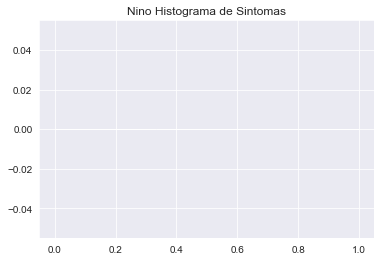

In [257]:
import matplotlib.pyplot as pp

%matplotlib inline
pp.title("Nino Histograma de Sintomas")
pp.hist([ninoSintoma[i].genero for i in range(len(ninoSintoma))],bins=3,linewidth=1)
pp.grid(True)


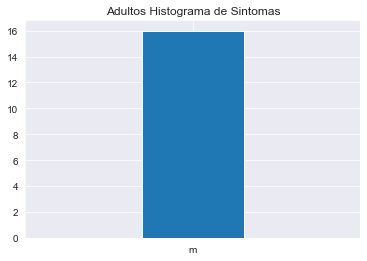

In [258]:
pp.title("Adultos Histograma de Sintomas")
pp.hist([adultoSintoma[i].genero for i in range(len(adultoSintoma))],bins=3,linewidth=1)
pp.grid(True)

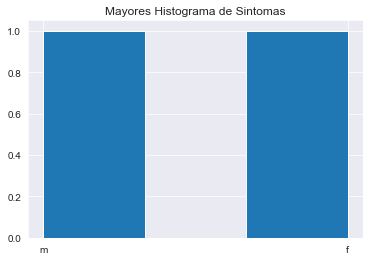

In [259]:
pp.title("Mayores Histograma de Sintomas")
pp.hist([mayorSintoma[i].genero for i in range(len(mayorSintoma))],bins=3,linewidth=1)
pp.grid(True)

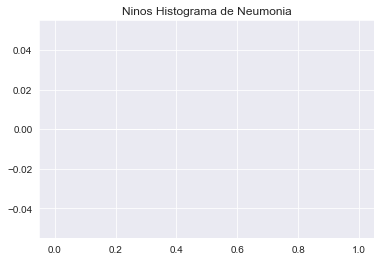

In [260]:
pp.title("Ninos Histograma de Neumonia")
pp.hist([ninoN[i].genero for i in range(len(ninoN))],bins=3,linewidth=1)
pp.grid(True)



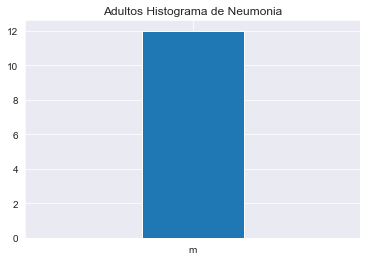

In [261]:
pp.title("Adultos Histograma de Neumonia")
pp.hist([adultoN[i].genero for i in range(len(adultoN))],bins=3,linewidth=1)
pp.grid(True)


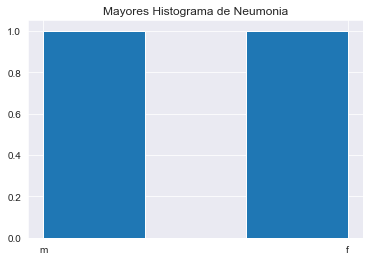

In [262]:
    
pp.title("Mayores Histograma de Neumonia")
pp.hist([mayorN[i].genero for i in range(len(mayorN))],bins=3,linewidth=1)
pp.grid(True)

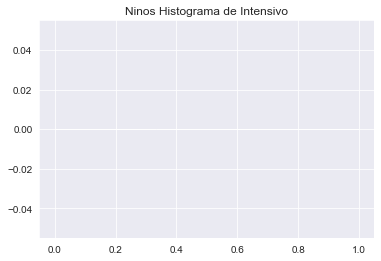

In [263]:
pp.title("Ninos Histograma de Intensivo")
pp.hist([ninoI[i].genero for i in range(len(ninoI))],bins=3,linewidth=1)
pp.grid(True)



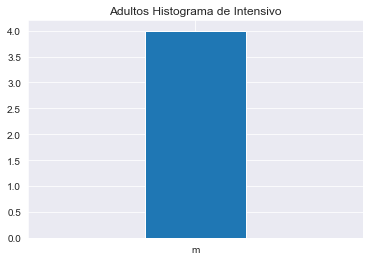

In [264]:
pp.title("Adultos Histograma de Intensivo")
pp.hist([adultoI[i].genero for i in range(len(adultoI))],bins=3,linewidth=1)
pp.grid(True)
    

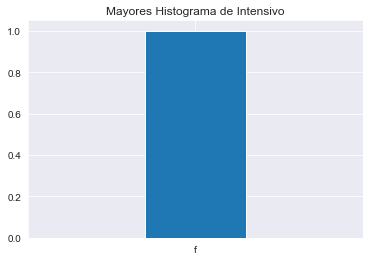

In [265]:
pp.title("Mayores Histograma de Intensivo")
pp.hist([mayorI[i].genero for i in range(len(mayorI))],bins=3,linewidth=1)
pp.grid(True)

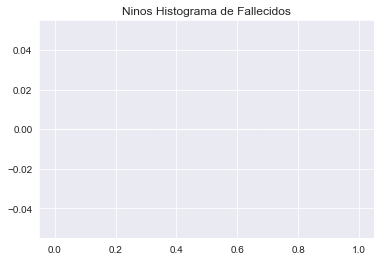

In [266]:
pp.title("Ninos Histograma de Fallecidos")
pp.hist([ninoF[i].genero for i in range(len(ninoF))],bins=3,linewidth=1)
pp.grid(True)


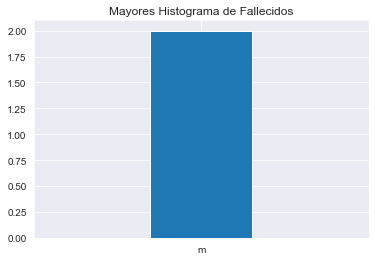

In [267]:
pp.title("Mayores Histograma de Fallecidos")
pp.hist([adultoF[i].genero for i in range(len(adultoF))],bins=3,linewidth=1)
pp.grid(True)
    

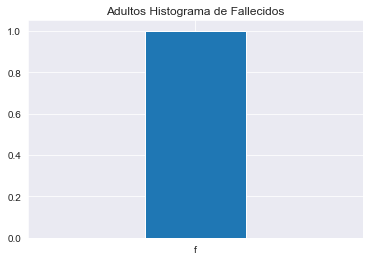

In [268]:
pp.title("Adultos Histograma de Fallecidos")
pp.hist([mayorF[i].genero for i in range(len(mayorF))],bins=3,linewidth=1)
pp.grid(True)

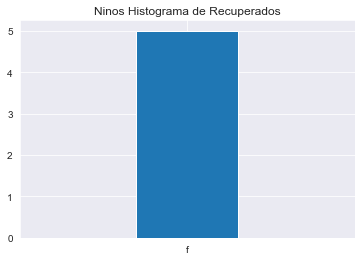

In [269]:
pp.title("Ninos Histograma de Recuperados")
pp.hist([ninoR[i].genero for i in range(len(ninoR))],bins=3,linewidth=1)
pp.grid(True)

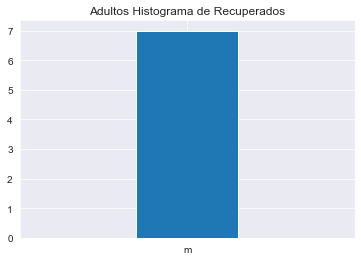

In [270]:
pp.title("Adultos Histograma de Recuperados")
pp.hist([adultoR[i].genero for i in range(len(adultoR))],bins=3,linewidth=1)
pp.grid(True)

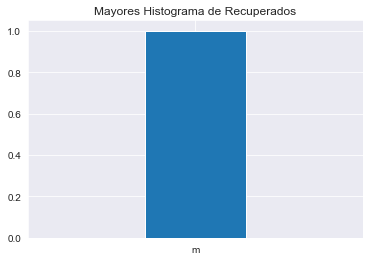

In [254]:
pp.title("Mayores Histograma de Recuperados")
pp.hist([mayorR[i].genero for i in range(len(mayorR))],bins=3,linewidth=1)
pp.grid(True)